In [15]:
import os, sys
import os.path as osp
root_dir = osp.dirname(osp.dirname(os.getcwd()))
package_dir = osp.join(root_dir, 'src')
sys.path.append(package_dir)
from ml_modules.data.datasets import DeepSTABp_Dataset
from ml_modules.data.transforms import norm_0to1

import torch
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
plt.rc('axes', axisbelow=True)
plt.rcParams.update({'figure.autolayout': True})

dataset = DeepSTABp_Dataset(
    experiment='lysate',
    organism=None,
    cell_line=None,
    version='v3-ogt',
    transform=None
)
dataset_trans = DeepSTABp_Dataset(
    experiment='lysate',
    organism=None,
    cell_line=None,
    version='v3-ogt',
    transform=norm_0to1
)
Tm_dict = dataset.Tm_dict

ogt2idx = {
    3:  0,
    20: 1,
    22: 2,
    25: 3,
    28: 4,
    32: 5,
    37: 6,
    55: 7,
    60: 8,
    70: 9,
}
cm = plt.get_cmap('gist_rainbow')

edge_types = ['backbone', 'codir', 'pae', 'coord', 'contact', 'deform']

 -> Generating dataset from d:\Dropbox\projects\ai-thermostability\code\data\collation\DeepSTABp\lysate.csv
 -> Number of entries in meta file    : 29758
     >> mean value of Tm  : 49.8242
     >> range of Tm       : 30.4417-92.5729
 -> Number of unique accessions       : 29758
 -> Final number of accessions        : 20255
     >> mean value of Tm: 50.4288
     >> range of Tm     : 30.4417-92.5729
 -> Number of unique accessions       : 20255
Dataset instantiation complete.
 -> Generating dataset from d:\Dropbox\projects\ai-thermostability\code\data\collation\DeepSTABp\lysate.csv
 -> Number of entries in meta file    : 29758
     >> mean value of Tm  : 49.8242
     >> range of Tm       : 30.4417-92.5729
 -> Number of unique accessions       : 29758
 -> Final number of accessions        : 20255
     >> mean value of Tm: 50.4288
     >> range of Tm     : 30.4417-92.5729
 -> Number of unique accessions       : 20255
Dataset instantiation complete.


In [2]:
# GATHER ALL REQUIRED INFORMATION

all_Tm = []
all_ogt = []
all_seq_length = []
pLDDT_by_protein = []
bfactors_by_protein = []
edge_count = {edge_type: [] for edge_type in edge_types}

pbar = tqdm(dataset)
for i, data in enumerate(pbar):
    pbar.set_description(data['accession'])

    all_Tm.append(Tm_dict[data['accession']])
    all_ogt.append(data.ogt)
    all_seq_length.append(data['residue'].num_nodes)
    pLDDT_by_protein.append(data['residue'].pLDDT.tolist())
    bfactors_by_protein.append(data['residue'].bfactor.tolist())
    
    for edge_type in edge_types:
        edge_count[edge_type].append(
            data['residue', edge_type, 'residue'].edge_index.shape[1]/2
        )

all_pLDDT = [e for protein in pLDDT_by_protein for e in protein]
all_bfactors = [e for protein in bfactors_by_protein for e in protein]

all_pLDDT_mean = [np.mean(e) for e in pLDDT_by_protein]
all_pLDDT_max = [np.max(e) for e in pLDDT_by_protein]
all_pLDDT_min = [np.min(e) for e in pLDDT_by_protein]
all_bfactor_mean = [np.mean(e) for e in bfactors_by_protein]
all_bfactor_max = [np.max(e) for e in bfactors_by_protein]
all_bfactor_min = [np.min(e) for e in bfactors_by_protein]

  0%|          | 0/20255 [00:00<?, ?it/s]

In [9]:
save = True

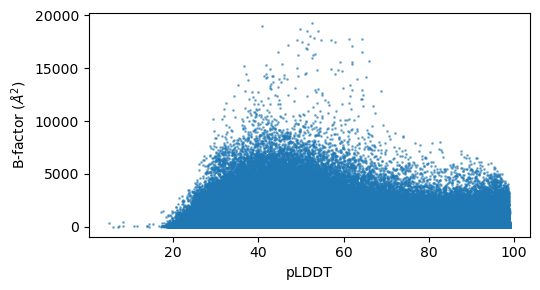

In [16]:
# pLDDT vs b-factor

plt.figure(figsize=(5.5, 3))

plt.scatter(
    all_pLDDT,
    all_bfactors,
    s=1,
    alpha=0.5
)

plt.xlabel('pLDDT')
plt.ylabel(r'B-factor ($\AA^2$)')
# plt.grid()
if save:
    plt.savefig('pLDDT_vs_bfactor.png', dpi=300)#, bbox_inches='tight')
plt.show()
plt.close()

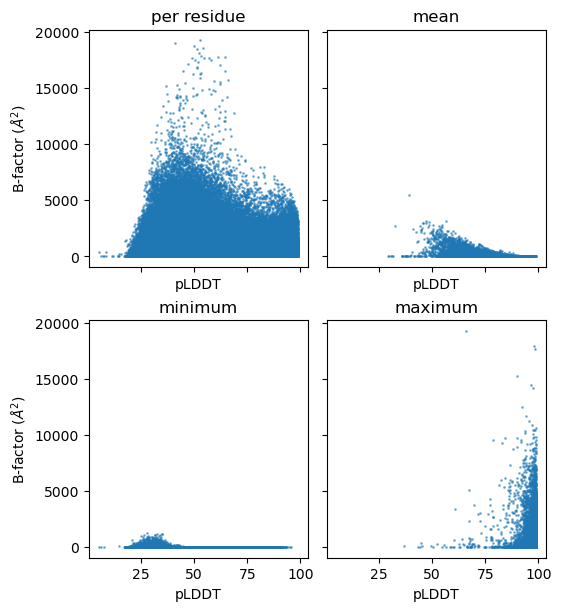

In [14]:
# pLDDT vs b-factor

fig, ax = plt.subplots(
    2, 2, sharex=True, sharey=True, figsize=(5.5,6), layout='compressed'
)
ax = ax.flatten()

ax[0].scatter(
    all_pLDDT,
    all_bfactors,
    s=1,
    alpha=0.5
)
ax[0].set_title('per residue')
ax[0].set_xlabel('pLDDT')
ax[0].set_ylabel(r'B-factor ($\AA^2$)')

ax[1].scatter(
    all_pLDDT_mean,
    all_bfactor_mean,
    s=1,
    alpha=0.5
)
ax[1].set_title('mean')
ax[1].set_xlabel('pLDDT')
# ax[1].set_ylabel(r'B-factor ($\AA^2$)')

ax[2].scatter(
    all_pLDDT_min,
    all_bfactor_min,
    s=1,
    alpha=0.5
)
ax[2].set_title('minimum')
ax[2].set_xlabel('pLDDT')
ax[2].set_ylabel(r'B-factor ($\AA^2$)')

ax[3].scatter(
    all_pLDDT_max,
    all_bfactor_max,
    s=1,
    alpha=0.5
)
ax[3].set_title('maximum')
ax[3].set_xlabel('pLDDT')
# ax[3].set_ylabel(r'B-factor ($\AA^2$)')

# plt.grid()
if save:
    plt.savefig('pLDDT_mean_vs_bfactor_mean.png', dpi=300)#, bbox_inches='tight')
plt.show()
plt.close()